<a href="https://colab.research.google.com/github/yohanesnuwara/RandomCoolStuffs/blob/master/petrel_style_wellog_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Petrel Style Well Log Display

For Schlumberger Petrel user, well log visualization is just beautiful. For example in the figure below, GR log of well Acacia 2 is filled with colors that represent GR values.

![alt text](https://benthamopen.com/contents/figures/TOPEJ/TOPEJ-10-118_F10.jpg)

We will create it using Python. 

# Reference

Source: [Stack Overflow](https://stackoverflow.com/questions/11564273/matplotlib-continuous-colormap-fill-between-two-lines/29656697)

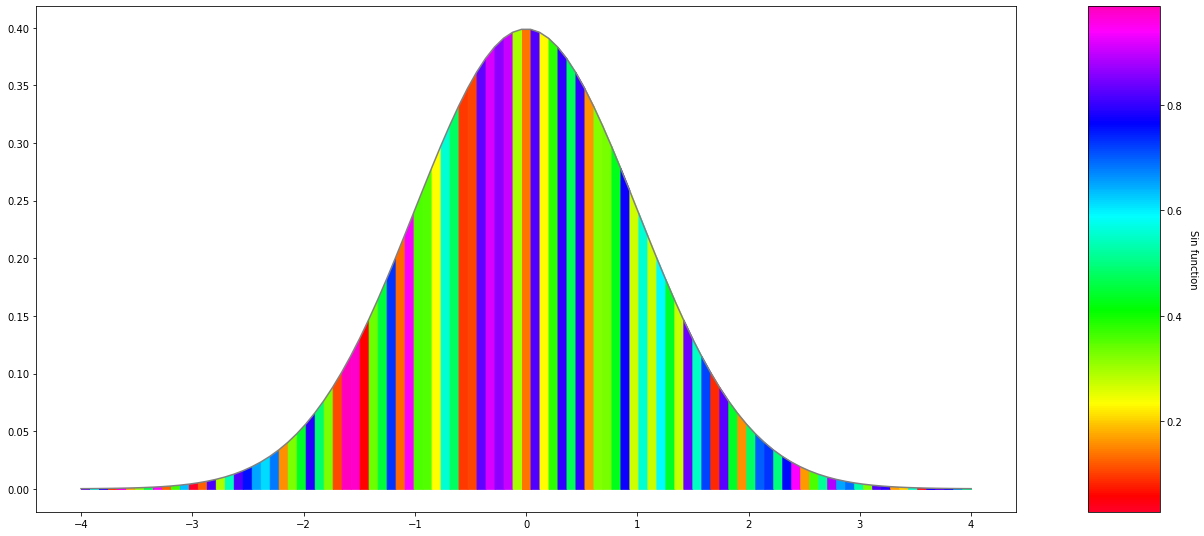

In [ ]:
"Modify with random value on colormap"

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm

# Select a color map
cmap = mpl.cm.gist_rainbow

# Some Test data
npts = 100
x = np.linspace(-4, 4, npts)
y = norm.pdf(x)
z = np.random.random_sample((npts,))
normalize = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

# The plot
fig = plt.figure(figsize=(20,9))
ax = fig.add_axes([0.12, 0.12, 0.68, 0.78])
plt.plot(x, y, color="gray")
for i in range(npts - 1):
    plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]], color=cmap(normalize(z[i])))

cbax = fig.add_axes([0.85, 0.12, 0.05, 0.78])
cb = mpl.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb.set_label("Sin function", rotation=270, labelpad=15)
plt.show()

# Apply to well log

Setting up.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Read LAS well log data.

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')
import lasreader

In [ ]:
log = lasreader.LASReader("/content/drive/My Drive/Colab Notebooks/KTB-01.las", null_subs=np.nan)

In [ ]:
# log.data['DEPTH']
# log.data['GR']
# log.data['DT']
# len(log.data['DEPTH'])

Apply

We would like to create a DT log with color fill of GR values.

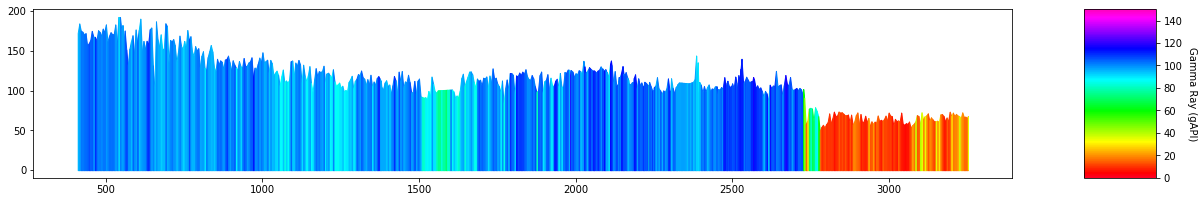

In [ ]:
"Apply to well log data"

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm

# Select a color map
cmap = mpl.cm.gist_rainbow

# Some Test data
npts = len(log.data['DEPTH'])
x = log.data['DEPTH']
y = log.data['DT']
z = log.data['GR']
normalize = mpl.colors.Normalize(vmin=0, vmax=150)

# The plot
fig = plt.figure(figsize=(20,3))
ax = fig.add_axes([0.12, 0.12, 0.68, 0.78])

for i in range(npts - 1):
    plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]], color=cmap(normalize(z[i])))

cbax = fig.add_axes([0.85, 0.12, 0.05, 0.78])
cb = mpl.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb.set_label("Gamma Ray (gAPI)", rotation=270, labelpad=15)
plt.show()

Rotate

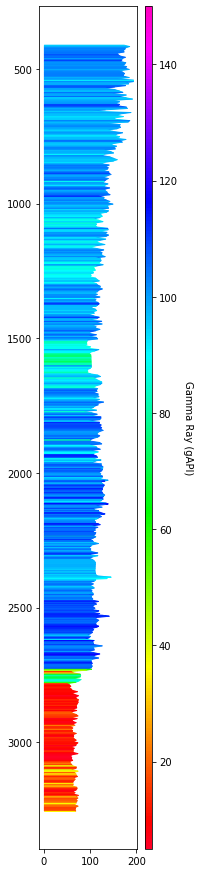

In [ ]:
"Apply to well log data"

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm

# Select a color map
cmap = mpl.cm.gist_rainbow

# Some Test data
npts = len(log.data['DEPTH'])
x = log.data['DEPTH']
y = log.data['DT']
z = log.data['GR']
normalize = mpl.colors.Normalize(vmin=5, vmax=150)

# The plot
fig = plt.figure(figsize=(2,15))
ax = fig.add_axes([0.12, 0.12, 0.68, 0.78])

# plt.plot(x, y, color="gray")
for i in range(npts - 1):
    plt.fill_betweenx([x[i], x[i+1]], [y[i], y[i+1]], color=cmap(normalize(z[i]))) # this code is changed (between to betweenx)

plt.gca().invert_yaxis() # invert y axis for depth
cbax = fig.add_axes([0.85, 0.12, 0.05, 0.78])
cb = mpl.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb.set_label("Gamma Ray (gAPI)", rotation=270, labelpad=15)
plt.show()

In [ ]:
z = z[~np.isnan(z)]
max(z)

118.60082245